Usage example of MediaPipe Holistic Solution API in Python (see also http://solutions.mediapipe.dev/holistic).

In [ ]:
!pip install mediapipe;

     |████████████████████████████████| 32.7 MB 1.3 MB/s 


Upload any image that that has a person. We take two example images from the web: https://unsplash.com/photos/v4zceVZ5HK8 and https://unsplash.com/photos/e_rhazQLaSs.


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving IMG-20190311-WA0023.jpg to IMG-20190311-WA0023.jpg


IMG-20190311-WA0023.jpg


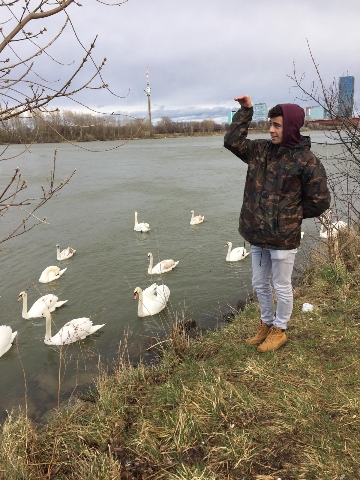

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import math
import numpy as np
DESIRED_HEIGHT = 480
DESIRED_WIDTH = 480

def resize_and_show(image):
  h, w = image.shape[:2]
  if h < w:
    img = cv2.resize(image, (DESIRED_WIDTH, math.floor(h/(w/DESIRED_WIDTH))))
  else:
    img = cv2.resize(image, (math.floor(w/(h/DESIRED_HEIGHT)), DESIRED_HEIGHT))
  cv2_imshow(img)

# Read images with OpenCV.
images = {name: cv2.imread(name) for name in uploaded.keys()}
# Preview the images.
for name, image in images.items():
  print(name)
  resize_and_show(image)

All MediaPipe Solutions Python API examples are under mp.solutions.

For the MediaPipe Pose solution, we can access this module as `mp_holistic = mp.solutions.holistic`.

You may change the parameters, such as `static_image_mode` and `min_detection_confidence`, during the initialization. Run `help(mp_holistic.Holistic)` to get more informations about the parameters.

In [ ]:
import mediapipe as mp
mp_holistic = mp.solutions.holistic

help(mp_holistic.Holistic)

Help on class Holistic in module mediapipe.python.solutions.holistic:

class Holistic(mediapipe.python.solution_base.SolutionBase)
 |  Holistic(static_image_mode=False, model_complexity=1, smooth_landmarks=True, enable_segmentation=False, smooth_segmentation=True, refine_face_landmarks=False, min_detection_confidence=0.5, min_tracking_confidence=0.5)
 |  
 |  MediaPipe Holistic.
 |  
 |  MediaPipe Holistic processes an RGB image and returns pose landmarks, left and
 |  right hand landmarks, and face mesh landmarks on the most prominent person
 |  detected.
 |  
 |  Please refer to https://solutions.mediapipe.dev/holistic#python-solution-api
 |  for usage examples.
 |  
 |  Method resolution order:
 |      Holistic
 |      mediapipe.python.solution_base.SolutionBase
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, static_image_mode=False, model_complexity=1, smooth_landmarks=True, enable_segmentation=False, smooth_segmentation=True, refine_face_landmarks=Fa

In [ ]:
# Import drawing_utils and drawing_styles.
mp_drawing = mp.solutions.drawing_utils 
mp_drawing_styles = mp.solutions.drawing_styles

Nose coordinates: (912.2179269790649, 434.38916206359863)
Pose landmarks of IMG-20190311-WA0023.jpg:


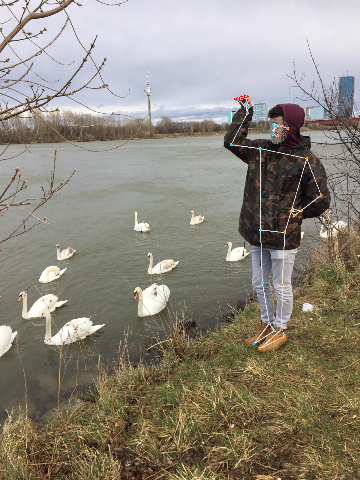

In [ ]:
# Run MediaPipe Holistic and draw pose landmarks.
with mp_holistic.Holistic(
    static_image_mode=True, min_detection_confidence=0.5, model_complexity=2) as holistic:
  for name, image in images.items():
    # Convert the BGR image to RGB and process it with MediaPipe Pose.
    results = holistic.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Print nose coordinates.
    image_hight, image_width, _ = image.shape
    if results.pose_landmarks:
      print(
        f'Nose coordinates: ('
        f'{results.pose_landmarks.landmark[mp_holistic.PoseLandmark.NOSE].x * image_width}, '
        f'{results.pose_landmarks.landmark[mp_holistic.PoseLandmark.NOSE].y * image_hight})'
      )

    # Draw pose landmarks.
    print(f'Pose landmarks of {name}:')
    annotated_image = image.copy()
    mp_drawing.draw_landmarks(annotated_image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(annotated_image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(
        annotated_image,
        results.face_landmarks,
        mp_holistic.FACEMESH_TESSELATION,
        landmark_drawing_spec=None,
        connection_drawing_spec=mp_drawing_styles
        .get_default_face_mesh_tesselation_style())
    mp_drawing.draw_landmarks(
        annotated_image,
        results.pose_landmarks,
        mp_holistic.POSE_CONNECTIONS,
        landmark_drawing_spec=mp_drawing_styles.
        get_default_pose_landmarks_style())
    resize_and_show(annotated_image)

Nose world landmark:
x: 0.013211555778980255
y: -0.6160681843757629
z: -0.2703184187412262
visibility: 0.997553288936615

Pose world landmarks of IMG-20190311-WA0023.jpg:


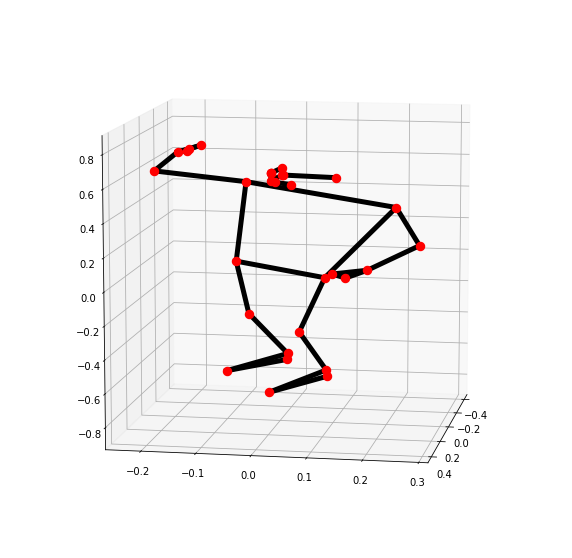

In [ ]:
# Run MediaPipe Holistic and plot 3d pose world landmarks.
with  mp_holistic.Holistic(static_image_mode=True) as holistic:
  for name, image in images.items():
    results = holistic.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Print the real-world 3D coordinates of nose in meters with the origin at
    # the center between hips.
    print('Nose world landmark:'),
    print(results.pose_world_landmarks.landmark[mp_holistic.PoseLandmark.NOSE])
    
    # Plot pose world landmarks.
    print(f'Pose world landmarks of {name}:')
    mp_drawing.plot_landmarks(
        results.pose_world_landmarks, mp_holistic.POSE_CONNECTIONS)

In [ ]:
len(results.pose_world_landmarks.landmark)

33

Pose segmentation of IMG-20190311-WA0023.jpg:


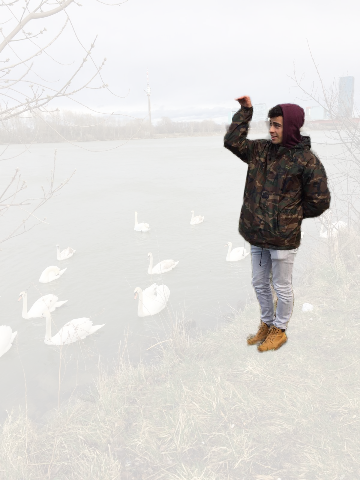

In [ ]:
# Run MediaPipe Holistic with `enable_segmentation=True` to get pose segmentation.
with mp_holistic.Holistic(
    static_image_mode=True, enable_segmentation=True) as holistic:
  for name, image in images.items():
    results = holistic.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Draw pose segmentation.
    print(f'Pose segmentation of {name}:')
    annotated_image = image.copy()
    red_img = np.zeros_like(annotated_image, dtype=np.uint8)
    red_img[:, :] = (255,255,255)
    segm_2class = 0.2 + 0.8 * results.segmentation_mask
    segm_2class = np.repeat(segm_2class[..., np.newaxis], 3, axis=2)
    annotated_image = annotated_image * segm_2class + red_img * (1 - segm_2class)
    resize_and_show(annotated_image)

Codigo que me puede servir 


In [ ]:
def extract_keypoints(results):
  return np.array([[res.x, res.y, res.z] for res in results.multi_hand_landmarks[0].landmark]).flatten()

In [ ]:
# Funcion que procesa una imagen y detecta si hay una mano
def process_image(image_path='', img=None, show_image=False, static_mode=True):
  with mp_hands.Hands(static_image_mode=static_mode, min_detection_confidence=0.5, min_tracking_confidence=0.5, max_num_hands=1) as hands:
    keypoints = None
    left_hand = None
    image = None

    # Carga la imagen
    if image_path != '':
      image = cv2.imread(image_path)
    elif img is not None:
      image = img
    else:
      return None, None

    # Cambia la imagen para mejor proceso
    image = cv2.flip(image, 1)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Procesa la imagen
    results = hands.process(image_rgb)
    
    # Comprueba si ha detectado una mano
    if results.multi_hand_landmarks is not None:

      # Si detecta que es mano izquierda, flipea para fingir una mano derecha
      if results.multi_handedness[0].classification[0].label == 'Left':
        left_hand = True
        image_rgb = cv2.flip(image_rgb, 1)
        results = hands.process(image_rgb)
      else:
        left_hand = False

      # Volvemos a comprobar que el results no es None
      if results.multi_hand_landmarks is not None:
        # Extrae los keypoints
        keypoints = extract_keypoints(results)
    
        if left_hand is True: image = cv2.flip(image, 1)

        # Dibuja los keypoints sobre la imagen
        for hand_landmarks in results.multi_hand_landmarks:
          mp_drawing.draw_landmarks(image, hand_landmarks, mp_hands.HAND_CONNECTIONS)

        if left_hand is False: image = cv2.flip(image, 1)

        # Muestra la imagen si el parametro es true
        if show_image == True:
          cv2_imshow(image)
          cv2.waitKey(0)
          cv2.destroyAllWindows()

  return keypoints, results, image

# Intento de que lo haga a partir de un video en directo

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

# initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

caputra de foto y video : 


In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

img = cv2.imread('photo.jpg')

photo_process(img)

name 'take_photo' is not defined


NameError: ignored

In [ ]:
# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0 
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])
    
    photo_process(img)
    clear_output(wait=True)

<IPython.core.display.Javascript object>

NameError: ignored

COsas que he encontrado 

https://github.com/google/mediapipe/blob/master/mediapipe/examples/desktop/youtube8m/README.md

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path_video = "/content/drive/MyDrive/salto.mp4"
import cv2
video = cv2.VideoCapture(path_video)

In [ ]:
from IPython.display import HTML
from base64 import b64encode
mp4 = open(path_video,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [ ]:
with  mp_holistic.Holistic(static_image_mode=True,  min_detection_confidence=0.5, model_complexity=2) as holistic:
  for name, image in images.items():
    results = holistic.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
Video = cv2.VideoCapture(path_video)
count = 0 
while(Video.isOpened()): #True
    ret, frame = Video.read()
    count +=1
    if count==20:#%10==0:
      #Usar Aquí mediapipe para que obtenga las posiciones de cada frame

    if ret == True:
      if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    else:
        break
Video.release()
cv2.destroyAllWindows()

27.714285714285715

In [ ]:
# private SurfaceTexture surfaceTexture;
# MediaPlayer player;
#  private void mediaPlay(){
#         surfaceTexture = new MySurfaceTexture(42);
#         Uri filUri = Uri.parse(FILE_PATH);
#          player = MediaPlayer.create(this,filUri);
#         player.setSurface(new Surface(surfaceTexture));
#         player.setLooping(true);
#         player.start();
#     }
def mediaPlay(self):
    self.surfaceTexture = MySurfaceTexture(42)
    self.player = MediaPlayer.create(self, Uri.parse(self.FILE_PATH))
    self.player.setSurface(Surface(self.surfaceTexture))
    self.player.setLooping(True)
    self.player.start()
    return

# Now You can set this surfaceTexture to ExternalTextureConverter Object

 converter.setSurfaceTextureAndAttachToGLContext(surfaceTexture,DISPLAY_SIZE_WIDTH, DISPLAY_SIZE_HEIGHT)

IndentationError: ignored

In [ ]:
# public class MySurfaceTexture extends SurfaceTexture {
#     public MySurfaceTexture(int texName) {
#         super(texName);
#         init();
#     }

#     private void init() {
#         super.detachFromGLContext();
#     }
# }
class MySurfaceTexture(SurfaceTexture):
    def __init__(self, texName):
        super().__init__(texName)
        self.init()

    def init(self):
        self.detachFromGLContext()

NameError: ignored